In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [20]:
df = pd.read_csv('/content/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [21]:
#### Rename Columns
df.rename(columns={'Gender':'gender', 'Age':'age','Annual Income (k$)':'income','Spending Score (1-100)':'score'}, inplace=True)

In [65]:
df

,gender,age,income,Score,clusters,age_clusters
0,Male,19,15,39,0,2
1,Male,21,15,81,4,0
2,Female,20,16,6,0,3
3,Female,23,16,77,4,0
4,Female,31,17,40,0,2
...,...,...,...,...,...,...
195,Female,35,120,79,3,0
196,Female,45,126,28,2,1
197,Male,32,126,74,3,0
198,Male,32,137,18,2,3


In [66]:
df.shape

(200, 6)

In [67]:
df.isnull().sum()

,0
gender,0
age,0
income,0
Score,0
clusters,0
age_clusters,0


In [72]:
df

,gender,age,income,Score,clusters,age_clusters
0,Male,19,15,39,0,2
1,Male,21,15,81,4,0
2,Female,20,16,6,0,3
3,Female,23,16,77,4,0
4,Female,31,17,40,0,2
...,...,...,...,...,...,...
195,Female,35,120,79,3,0
196,Female,45,126,28,2,1
197,Male,32,126,74,3,0
198,Male,32,137,18,2,3


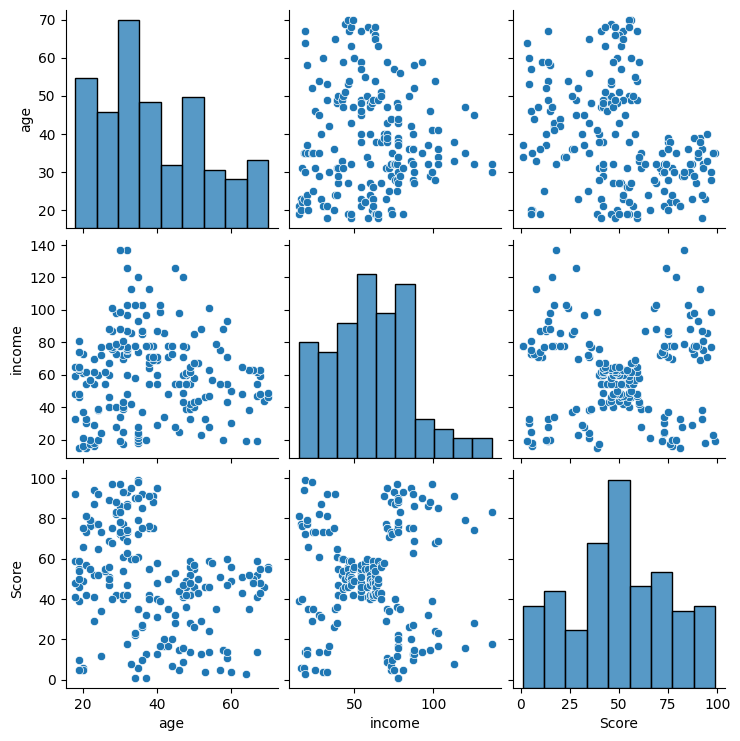

In [77]:
seaborn.pairplot(df[['age','income','Score']])
plt.show()

In [78]:
x = df.drop(['Score','gender'], axis = 1)
x

,age,income,clusters,age_clusters
0,19,15,0,2
1,21,15,4,0
2,20,16,0,3
3,23,16,4,0
4,31,17,0,2
...,...,...,...,...
195,35,120,3,0
196,45,126,2,1
197,32,126,3,0
198,32,137,2,3


In [79]:
y = df['Score']
y

,Score
0,39
1,81
2,6
3,77
4,40
...,...
195,79
196,28
197,74
198,18


In [80]:
import sklearn.cluster as cluster

In [81]:
kmeans = cluster.KMeans(n_clusters = 5) # k = 5

In [82]:
kmeans = kmeans.fit(df[['income','Score']])

In [83]:
kmeans.cluster_centers_

array([[26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571]])

In [85]:
df['clusters'] = kmeans.labels_

In [86]:
df['clusters']

,clusters
0,0
1,3
2,0
3,3
4,0
...,...
195,2
196,4
197,2
198,4


In [87]:
df.head(15)

,gender,age,income,Score,clusters,age_clusters
0,Male,19,15,39,0,2
1,Male,21,15,81,3,0
2,Female,20,16,6,0,3
3,Female,23,16,77,3,0
4,Female,31,17,40,0,2
5,Female,22,17,76,3,0
6,Female,35,18,6,0,3
7,Female,23,18,94,3,0
8,Male,64,19,3,0,1
9,Female,30,19,72,3,0


In [88]:
df['clusters'].value_counts()

,count
clusters,
1,81
2,39
4,35
0,23
3,22


<Axes: xlabel='income', ylabel='Score'>

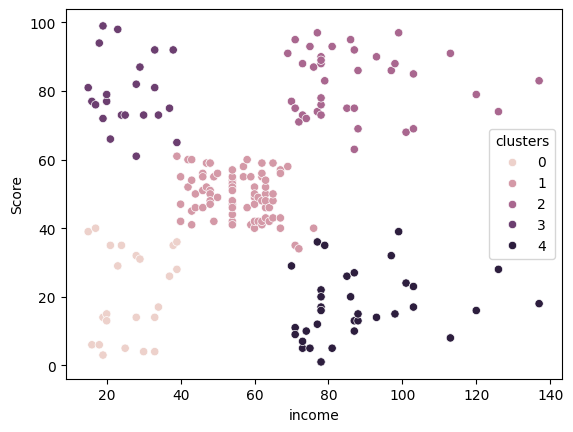

In [89]:
seaborn.scatterplot(x ='income', y='Score', hue='clusters', data=df)

In [90]:
from sklearn.cluster import KMeans


In [91]:
K_range = range(1,15)
wcss = []

In [92]:
for k in K_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['income','Score']])
    wcss.append(km.inertia_)  #Inertia_ is the sum of squared error for each cluster.

In [93]:
wcss

[269981.28000000014,
 183653.3289473683,
 106348.37306211119,
 73880.64496247198,
 44448.45544793369,
 37455.98455516028,
 33870.80058476308,
 25061.264092290665,
 26952.659745833967,
 20673.531111423843,
 17912.7573433027,
 15961.902986261062,
 15873.257864879173,
 13883.585788466931]

Text(0.5, 1.0, 'Tennis Elbow Courve')

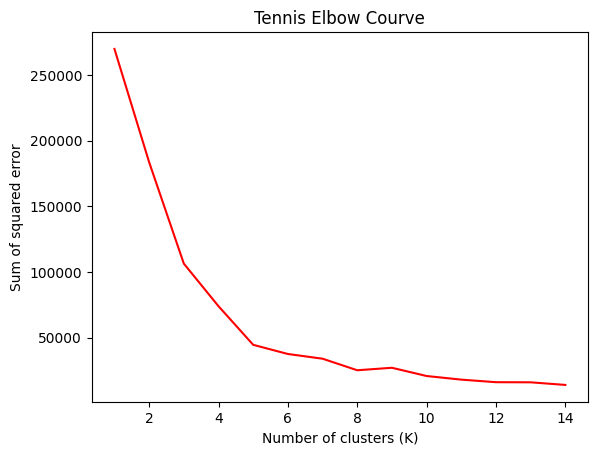

In [94]:
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of squared error')
plt.plot(K_range,wcss,color='red')
plt.title('Tennis Elbow Courve')

In [95]:
K_range = range(1,20)
wcss2 = []

In [96]:
for k in K_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['age','Score']])
    wcss2.append(km.inertia_) #Inertia_ is the sum of squared error for each cluster.

In [97]:
wcss2

[171535.50000000003,
 75949.15601023012,
 45844.53681626927,
 28165.583566629342,
 23919.196108532546,
 19848.77022260894,
 17261.808061821226,
 13091.763404723928,
 12297.544306156811,
 10888.521875736355,
 10652.764680691502,
 9112.932251584845,
 8573.479101448938,
 7655.13925983437,
 6933.27464632318,
 6368.829302139209,
 6180.196370537678,
 5472.038243782364,
 5224.857814407815]

Text(0.5, 1.0, 'Tennis Elbow Courve')

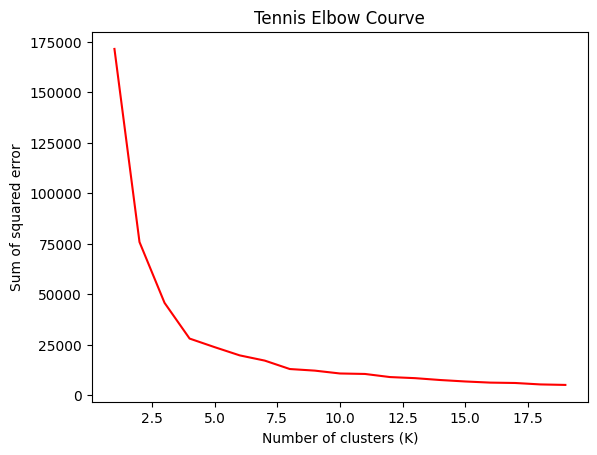

In [98]:
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of squared error')
plt.plot(K_range,wcss2,color='red')
plt.title('Tennis Elbow Courve')

In [99]:
kmeans2 = cluster.KMeans(n_clusters = 4)

In [100]:
kmeans2 = kmeans2.fit(df[['age','Score']])

In [101]:
kmeans2.cluster_centers_

array([[27.61702128, 49.14893617],
       [30.1754386 , 82.35087719],
       [43.29166667, 15.02083333],
       [55.70833333, 48.22916667]])

In [102]:
df['age_clusters'] = kmeans2.labels_

In [103]:
df['age_clusters'].value_counts()

,count
age_clusters,
1,57
2,48
3,48
0,47


In [127]:
df

,gender,age,income,Score,clusters,age_clusters
0,Male,19,15,39,0,0
1,Male,21,15,81,3,1
2,Female,20,16,6,0,2
3,Female,23,16,77,3,1
4,Female,31,17,40,0,0
...,...,...,...,...,...,...
195,Female,35,120,79,2,1
196,Female,45,126,28,4,2
197,Male,32,126,74,2,1
198,Male,32,137,18,4,2


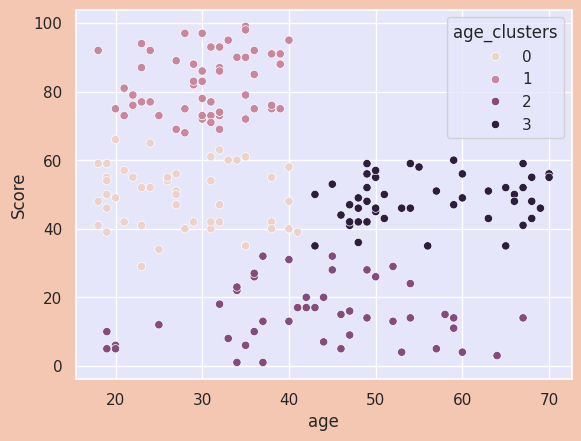

<Figure size 640x480 with 0 Axes>

In [126]:
seaborn.scatterplot(x='age', y='Score',hue='age_clusters',data=df)
plt.figure(facecolor='#94F008')
seaborn.set(rc={'axes.facecolor':'lavender', 'figure.facecolor':'#F4C7B3'})
plt.show()